In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/heart_disease_clinical_data.csv"

heart_disease_clinical_data = pd.read_csv(url)
heart_disease_clinical_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


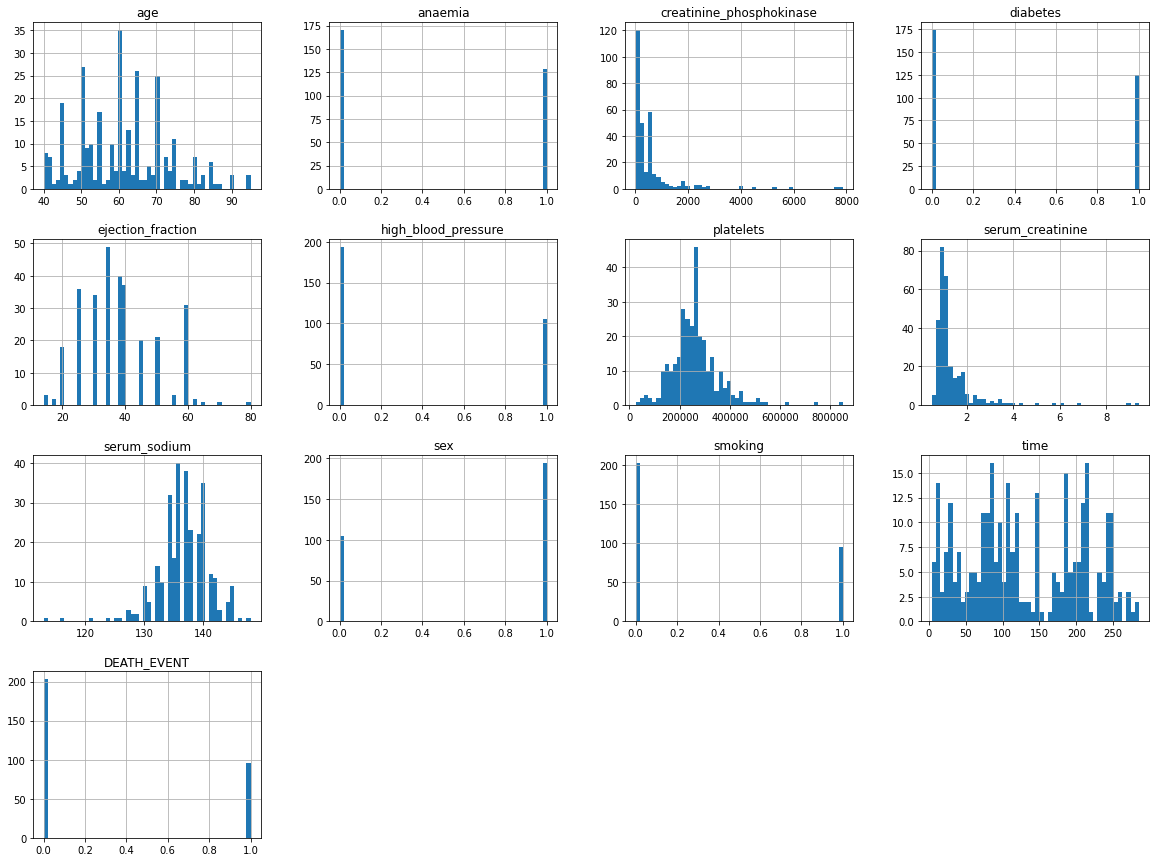

In [ ]:
# explore the data quickly using histograms
%matplotlib inline 
heart_disease_clinical_data.hist(bins=50, figsize=(20,15))
plt.show()

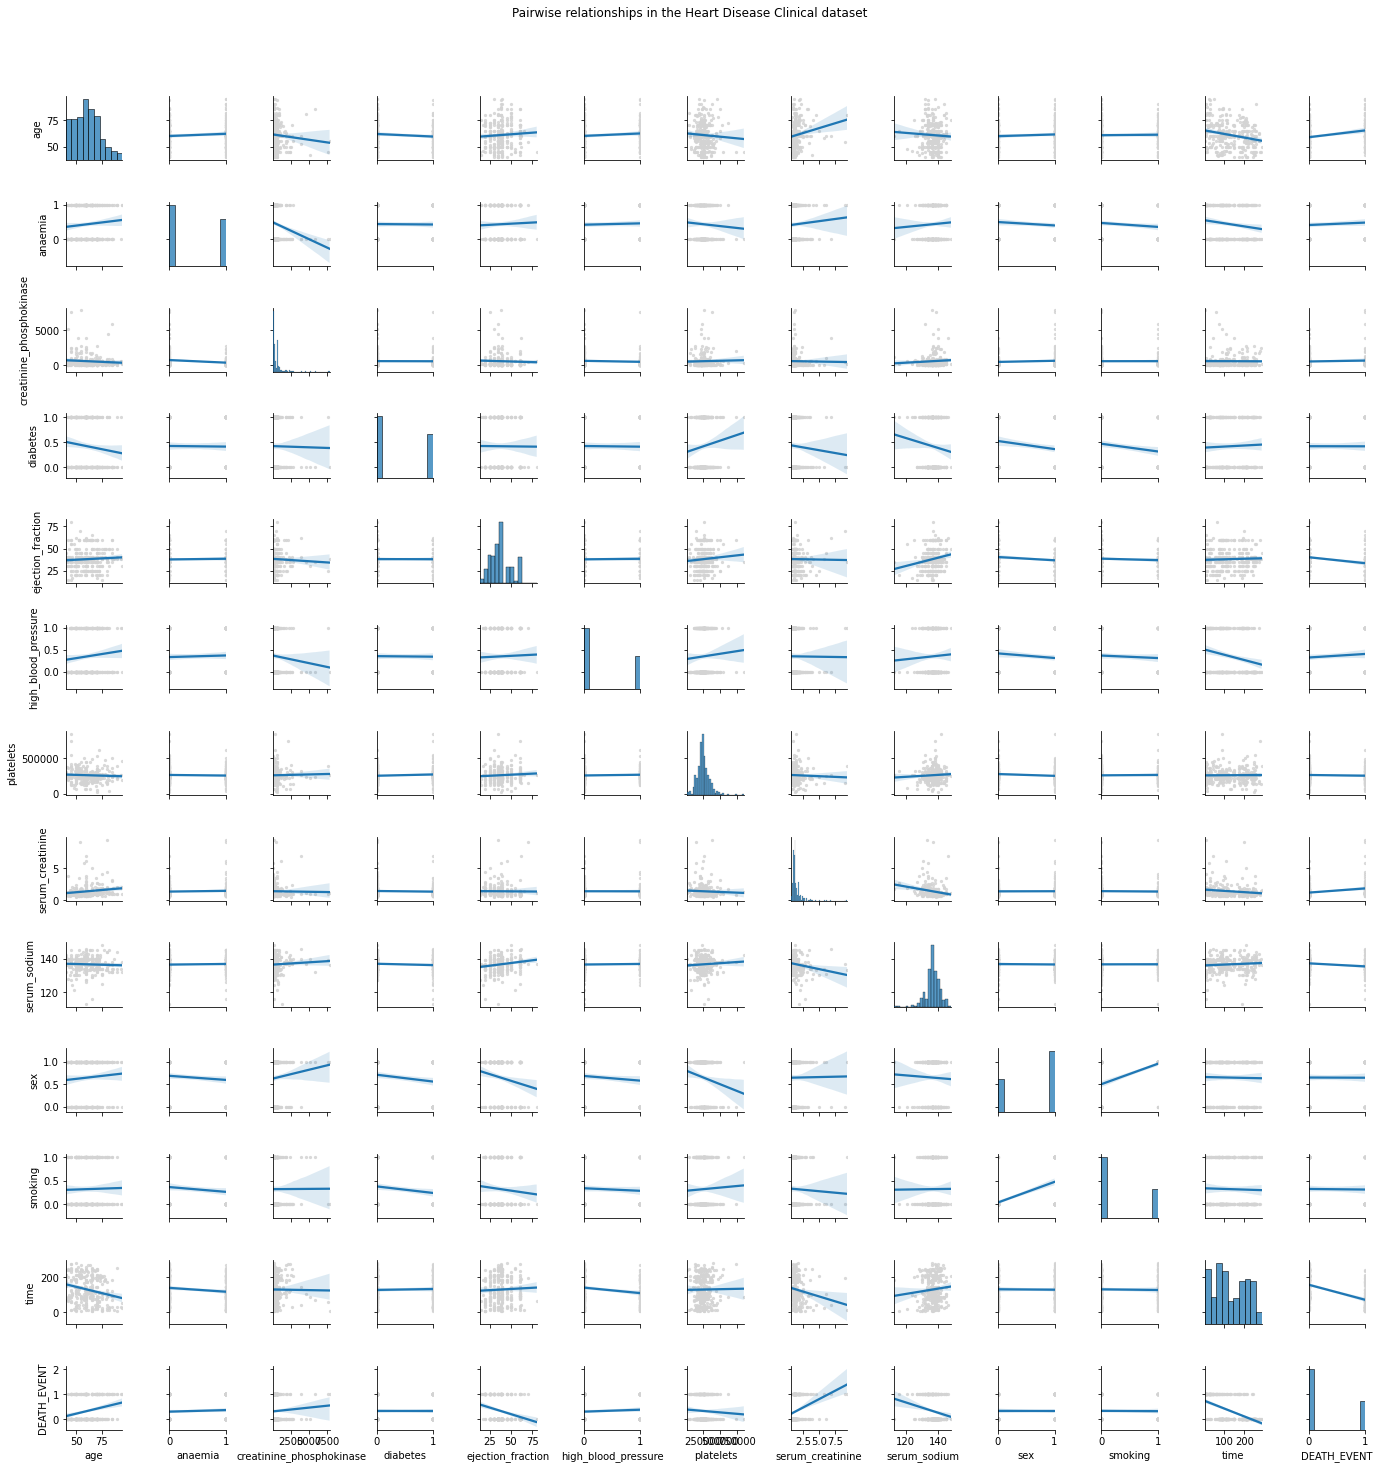

In [ ]:
# Quick style paired plot for further investigation into any possible relationships
# Styled pair plot
g=sns.pairplot(
    data=heart_disease_clinical_data,
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the Heart Disease Clinical dataset", y=1.05
);

# Question 1: Is there a relationship between abnormally high creatinine phosphokinase levels (normal range = 10 to 120 micrograms per liter) and whether or not a patient has diabetes? Use a violin plot to show the distribution.


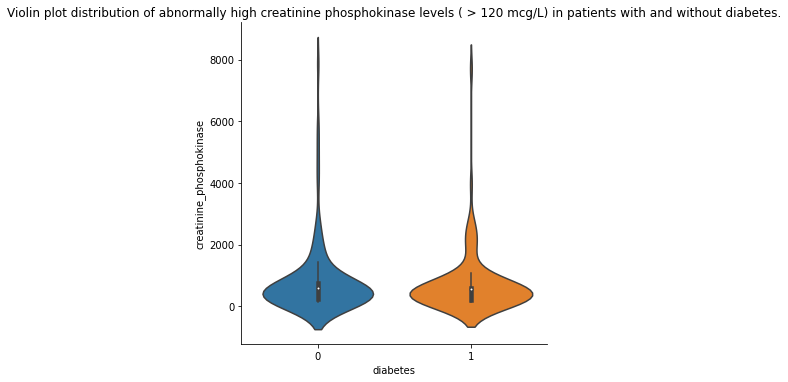

In [ ]:
sns.catplot(
    data=heart_disease_clinical_data[(heart_disease_clinical_data.creatinine_phosphokinase > 120) ],
    y="creatinine_phosphokinase",
    x="diabetes",
    kind="violin"
)
plt.title("Violin plot distribution of abnormally high creatinine phosphokinase levels ( > 120 mcg/L) in patients with and without diabetes.");

Based upon this plot, there seems to be no signficant difference between abnormally high creatinine phosphokinase levels and diabetes.

# Question 2: Are patients categorized to have high blood pressure as they get older? Use a boxplot to display the distribution of ages.



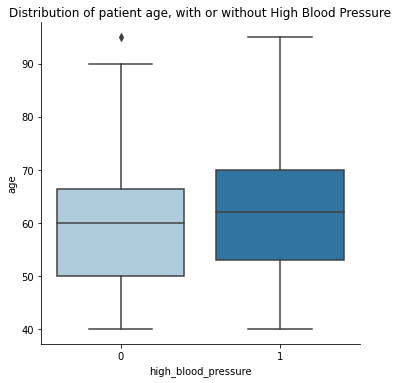

In [ ]:
sns.catplot(
    data=heart_disease_clinical_data, 
    x="high_blood_pressure",
    y="age",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    height=5,
    palette="Paired"
    ) 
plt.title("Distribution of patient age, with or without High Blood Pressure");

Based upon this plot, older patients in this dataset have high blood pressure more often than younger patients. 

# Question 3: Is there any relationship between serum sodium levels and serum creatinine levels in patients?

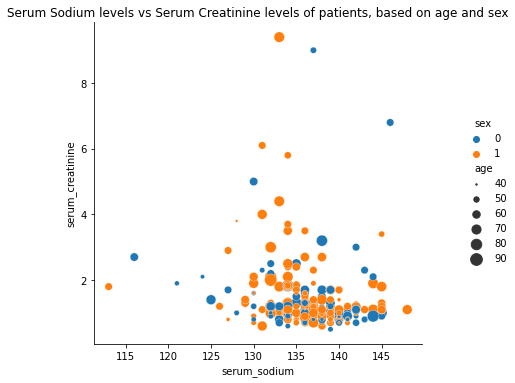

In [ ]:
sns.relplot(
    data=heart_disease_clinical_data,
    x="serum_sodium",
    y="serum_creatinine",
    size="age",
    sizes=(2,150),
    hue="sex",
)
plt.title("Serum Sodium levels vs Serum Creatinine levels of patients, based on age and sex");

Based upon this plot, it appears that older males in this dataset typically have elevanted serum creatinine levels ( > 1.21) within the normal range of serum sodium levels ( < 135, > 145)

# Question 4: Create a regression plot between patient platelets levels and serum sodium levels and serum creatinine levels.

Text(0.5, 1.0, 'Regression of platelets vs serum creatinine')

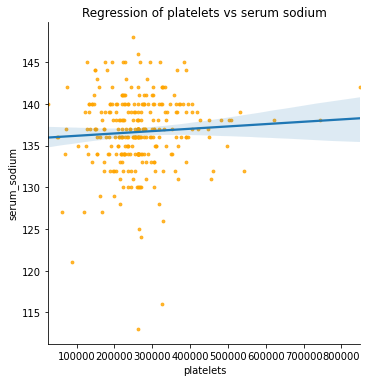

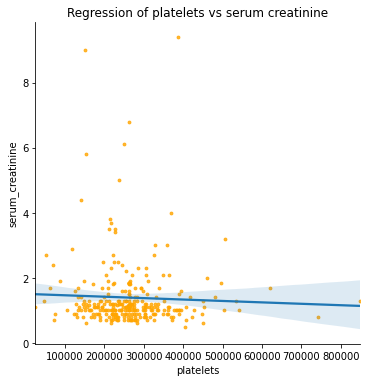

In [ ]:
# Regression plot
sns.lmplot(
    data=heart_disease_clinical_data,
    x="platelets", 
    y="serum_sodium",
    scatter_kws={'s':8, 'color':'orange'}
)
plt.title(
"Regression of platelets vs serum sodium"
)

# Regression plot
sns.lmplot(
    data=heart_disease_clinical_data,
    x="platelets", 
    y="serum_creatinine",
    scatter_kws={'s':8, 'color':'orange'}
)
plt.title(
"Regression of platelets vs serum creatinine"
)

Based upon these plots, there does not seem to be a direct correlation between patient platelets levels patient serum sodium levels or serum creatinine levels.

# Question 5: Do patients that smoke also have high blood pressure?





Text(0.5, 1.0, 'Counts of patients that are smokers/non-smokers and have/do not have high blood pressure  ')

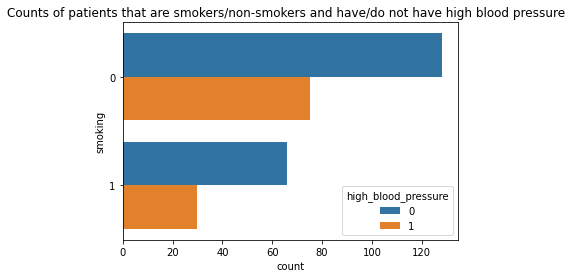

In [ ]:
sns.countplot(y="smoking", data=heart_disease_clinical_data, hue="high_blood_pressure")
plt.title(
"Counts of patients that are smokers/non-smokers and have/do not have high blood pressure  "
)

Based upon the plot, it appears that a smoking patient in this dataset is not also likely to have high bloodpressure, but rather non-smoking patients here are more likely to have high blood pressure.

# Create a test set and a training set using the original dataset. 

In [ ]:
# adding additional categorical columns for more information
import numpy as np

sodium_conditions = [
    (heart_disease_clinical_data['serum_sodium'] < 135),
    (heart_disease_clinical_data['serum_sodium'] > 145),
    ((heart_disease_clinical_data['serum_sodium'] <= 145) & (heart_disease_clinical_data['serum_sodium'] >= 135))]

creatinine_conditions = [
    (heart_disease_clinical_data['serum_creatinine'] < 0.8),
    (heart_disease_clinical_data['serum_creatinine'] > 1.21),
    ((heart_disease_clinical_data['serum_creatinine'] >= 0.8) & (heart_disease_clinical_data['serum_creatinine'] <= 1.21))]

values = ['low', 'high', 'normal']

heart_disease_clinical_data['serum_sodium_range'] = np.select(sodium_conditions, values)
heart_disease_clinical_data['serum_creatinine_range'] = np.select(creatinine_conditions, values)
heart_disease_clinical_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum_sodium_range,serum_creatinine_range
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,low,high
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,normal,normal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,low,high
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,normal,high
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,normal,normal
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,normal,normal
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,normal,normal
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,normal,high


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


########################################
#### Prepare test and training sets ####
########################################

# First task: split the data
# Create the categorical variables based upon age for stratified sampling.
heart_disease_clinical_data["age_cat"] = pd.cut(heart_disease_clinical_data["age"],
                              bins=[30.0, 40.0, 50.0, 60.0, 70.0, 80.0, np.inf],
                              labels=[1, 2, 3, 4, 5,6])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(heart_disease_clinical_data, heart_disease_clinical_data["age_cat"]):
    strat_train_set = heart_disease_clinical_data.loc[train_index]
    strat_test_set = heart_disease_clinical_data.loc[test_index]

# the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

# Separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and the target values.
train_data = strat_train_set.drop("DEATH_EVENT", axis=1) # drop labels for training set
train_data_labels = strat_train_set["DEATH_EVENT"].copy() # target to predict
# build model to predict income value based on the other attributes in the data set
train_data # dataset we will clean up
# Death event = binary data = classification

########################
####  Data Cleaning ####
########################

train_data = train_data.dropna().reset_index(drop=True)

# remove the text attribute because median can only be calculated on numerical attributes:
heart_disease_clinical_data_num = train_data.drop(['serum_sodium_range','serum_creatinine_range'], axis=1)

# simpleimputer used to fillout missing values, find strategy, apply to entire dataset, if attribute text, can't calculate median
imputer = SimpleImputer(strategy="median")

###################################
#### Put together the pipeline ####
###################################
num_attribs = list(heart_disease_clinical_data_num)
cat_attribs = ['serum_sodium_range','serum_creatinine_range']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
    ]) 

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Prepare the training set, including performing transformions
clinical_train_prepared = full_pipeline.fit_transform(train_data)

In [ ]:
# Training and evaluation: Use Classification models
from sklearn import svm
svc = svm.LinearSVC(max_iter=10000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter=1000)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)

In [ ]:
svc.fit(clinical_train_prepared, train_data_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
rf.fit(clinical_train_prepared, train_data_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.fit(clinical_train_prepared, train_data_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
mlp.fit(clinical_train_prepared, train_data_labels.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# model, data, labels, cv = # of folds
svc_scores = cross_val_score(svc, clinical_train_prepared, train_data_labels, cv=10)

In [ ]:
rf_scores = cross_val_score(rf, clinical_train_prepared, train_data_labels, cv=10)

In [ ]:
clf_scores = cross_val_score(clf, clinical_train_prepared, train_data_labels, cv=10)

In [ ]:
mlp_scores = cross_val_score(mlp, clinical_train_prepared, train_data_labels, cv=10)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
display_scores(svc_scores)

Scores: [0.79166667 0.875      0.83333333 0.91666667 0.875      0.75
 0.875      0.75       0.70833333 0.7826087 ]
Mean: 0.8157608695652174
Standard deviation: 0.0654888172261839


In [ ]:
display_scores(rf_scores)

Scores: [0.70833333 0.79166667 0.875      0.83333333 0.875      0.79166667
 0.91666667 0.83333333 0.70833333 0.7826087 ]
Mean: 0.8115942028985508
Standard deviation: 0.06556369409678565


In [ ]:
display_scores(clf_scores)

Scores: [0.79166667 0.875      0.83333333 0.91666667 0.875      0.75
 0.91666667 0.79166667 0.70833333 0.7826087 ]
Mean: 0.8240942028985507
Standard deviation: 0.06717302385165744


In [ ]:
display_scores(mlp_scores)

Scores: [0.70833333 0.75       0.875      0.83333333 0.875      0.70833333
 0.83333333 0.66666667 0.70833333 0.60869565]
Mean: 0.7567028985507246
Standard deviation: 0.08764091332899798


# Plot each model and proceed forward with the best

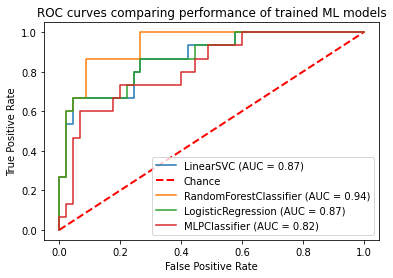

In [ ]:
from sklearn import datasets, metrics

# Prep the test data
test_data = strat_test_set.drop("DEATH_EVENT", axis=1)
test_labels = strat_test_set["DEATH_EVENT"].copy()

# now perform transformation on test set for missing values, add additional attributes
test_data_prepared = full_pipeline.transform(test_data)

svc_plot = metrics.plot_roc_curve(svc, test_data_prepared, test_labels)

ax = plt.gca()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance')

ax.set(title = "ROC curves comparing performance of trained ML models")
rf_plot = metrics.plot_roc_curve(rf, test_data_prepared, test_labels, ax=ax)
clf_plot = metrics.plot_roc_curve(clf, test_data_prepared, test_labels, ax=ax)
mlp_plot = metrics.plot_roc_curve(mlp, test_data_prepared, test_labels, ax=ax)


# Fine tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV
# grid search good if only working with a few parameters

# dictionary with hyperparameters to test
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30, 100], 'max_depth': [2, 4, 6, 8], 'random_state' : [0, 42]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_depth': [2, 3, 4], 'random_state' : [0, 42]},
  ]

forest = RandomForestClassifier()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)
grid_search.fit(clinical_train_prepared, train_data_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

# Test the best ML Classifier on the test set. 

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data_prepared)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(test_labels, final_predictions))
print('Accuracy of Random Forest model with test data: ', final_model.score(test_data_prepared,test_labels))

Results on the test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.92        45
           1       0.83      0.67      0.74        15

    accuracy                           0.88        60
   macro avg       0.86      0.81      0.83        60
weighted avg       0.88      0.88      0.88        60

Accuracy of Random Forest model with test data:  0.8833333333333333
